In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
data = pd.read_csv('school.csv')
#data.info()
data.head()

,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,...,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
0,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,...,Princeton University,national-universities,NaN,NaN,national-universities,1,private,NaN,ranked,2627
1,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,...,Harvard University,national-universities,NaN,NaN,national-universities,2,private,NaN,ranked,2155
2,NaN,NaN,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,...,University of Chicago,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774
3,NaN,NaN,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,...,Yale University,national-universities,NaN,NaN,national-universities,3,private,NaN,ranked,1426
4,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,...,Columbia University,national-universities,NaN,NaN,national-universities,5,private,NaN,ranked,2707


In [25]:
data.tail()

,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,...,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
306,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Cypress,tridentuniversityinternational,...,Trident University International,national-universities,NaN,NaN,national-universities,-2,proprietary,NaN,ur,41279
307,NaN,School refused to fill out U.S. News statistic...,True,NaN,https://www.usnews.com/img/college-photo_14624...,https://www.usnews.com/img/college-photo_14624...,NaN,NaN,Cincinnati,unioninstituteanduniversity,...,Union Institute and University,national-universities,NaN,NaN,national-universities,-2,private,NaN,ur,10923
308,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Phoenix,universityofphoenix,...,University of Phoenix,national-universities,NaN,NaN,national-universities,-2,proprietary,NaN,ur,209885
309,NaN,School refused to fill out U.S. News statistic...,True,NaN,NaN,NaN,NaN,NaN,Minneapolis,waldenuniversity,...,Walden University,national-universities,NaN,NaN,national-universities,-2,proprietary,NaN,ur,25042
310,NaN,NaN,False,NaN,NaN,NaN,NaN,8873.0,New Castle,wilmingtonuniversity,...,Wilmington University,national-universities,NaN,NaN,national-universities,-2,private,NaN,ur,7948


In [26]:
data.columns

Index([u'rankingNoteText', u'nonResponderText', u'nonResponder', u'act-avg',
       u'primaryPhoto', u'primaryPhotoThumb', u'sat-avg', u'enrollment',
       u'city', u'sortName', u'zip', u'rankingNoteCharacter',
       u'acceptance-rate', u'rankingDisplayScore', u'percent-receiving-aid',
       u'cost-after-aid', u'state', u'rankingSortRank', u'hs-gpa-avg',
       u'urlName', u'rankingDisplayName', u'rankingDisplayRank', u'ranking',
       u'xwalkId', u'rankingIsTied', u'isPublic', u'businessRepScore',
       u'tuition', u'engineeringRepScore', u'displayName', u'schoolType',
       u'region', u'aliasNames', u'rankingType', u'overallRank',
       u'institutionalControl', u'rankingMaxPossibleScore',
       u'rankingRankStatus', u'primaryKey'],
      dtype='object')

In [29]:
data.shape

(311, 39)

In [36]:
data_rank = data[data['overallRank'] > 0]
print (len(data_rank))
data_rank_enrollment = data_rank[data_rank['enrollment'] >= 0]
print (len(data_rank_enrollment))

230
230


Text(0.5,1,'Enrollment Given Rank')

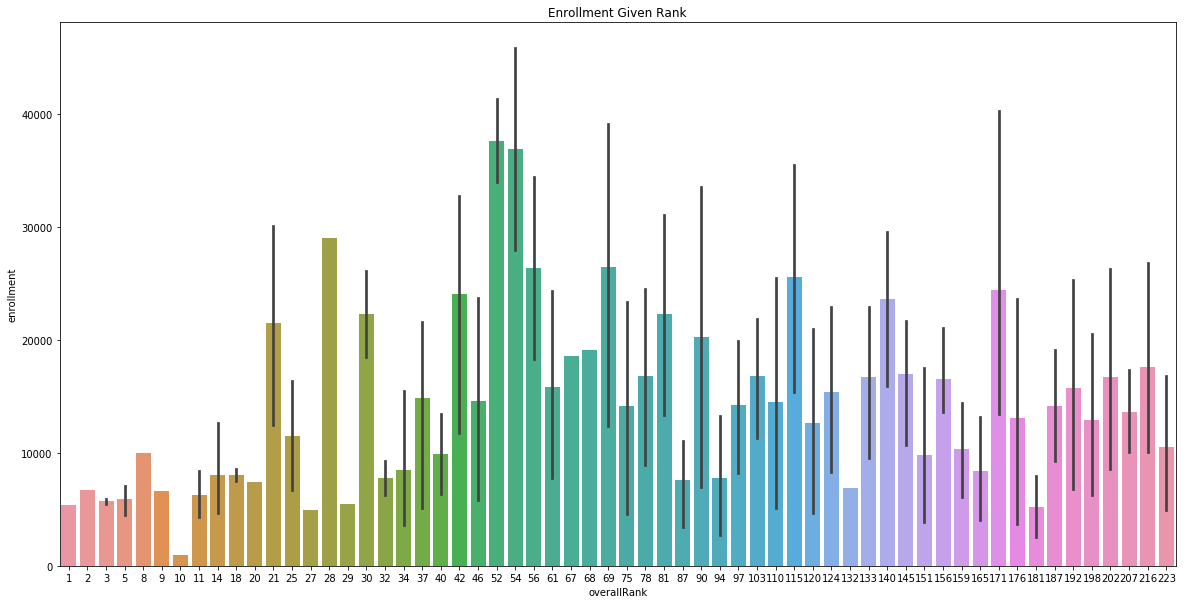

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_rank_enrollment['overallRank'], y=data_rank_enrollment['enrollment'])
plt.title('Enrollment Given Rank')

# Tuition Given Rank

In [41]:
data_rank_tuition = data_rank[data_rank['tuition'] >= 0]
print (len(data_rank_tuition))

230


Text(0.5,1,'Tuition Given Rank')

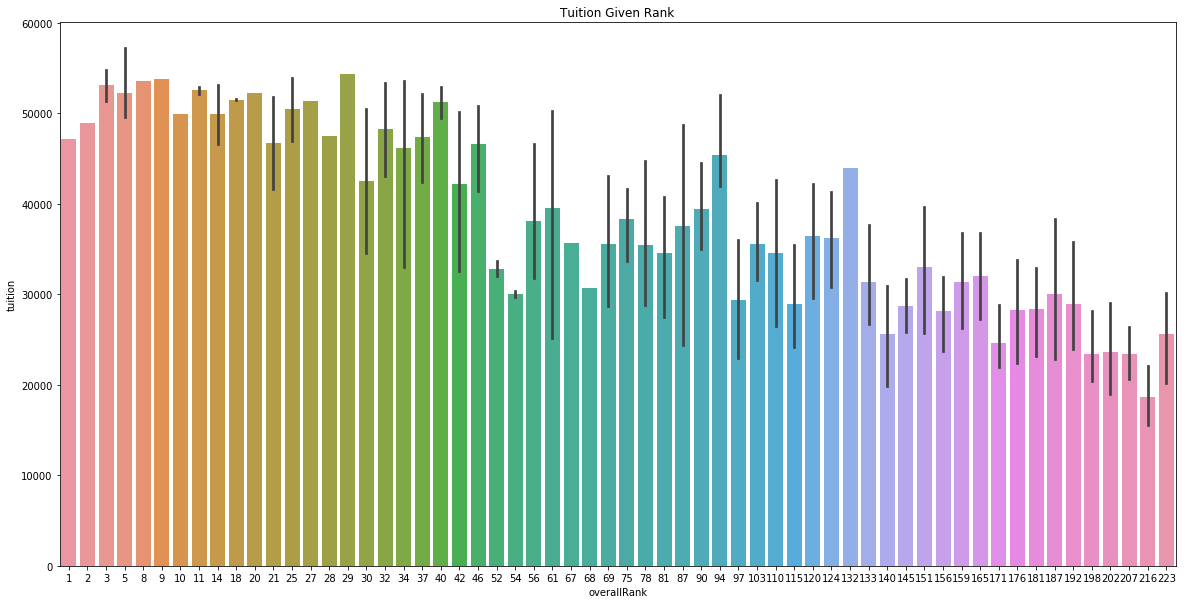

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_rank_enrollment['overallRank'], y=data_rank_enrollment['tuition'])
plt.title('Tuition Given Rank')

# Cost-After-Aid Given Rank

In [44]:
data_rank_cost = data_rank[data_rank['cost-after-aid'] >= 0]
print (len(data_rank_cost))

143


Text(0.5,1,'Cost Given Rank')

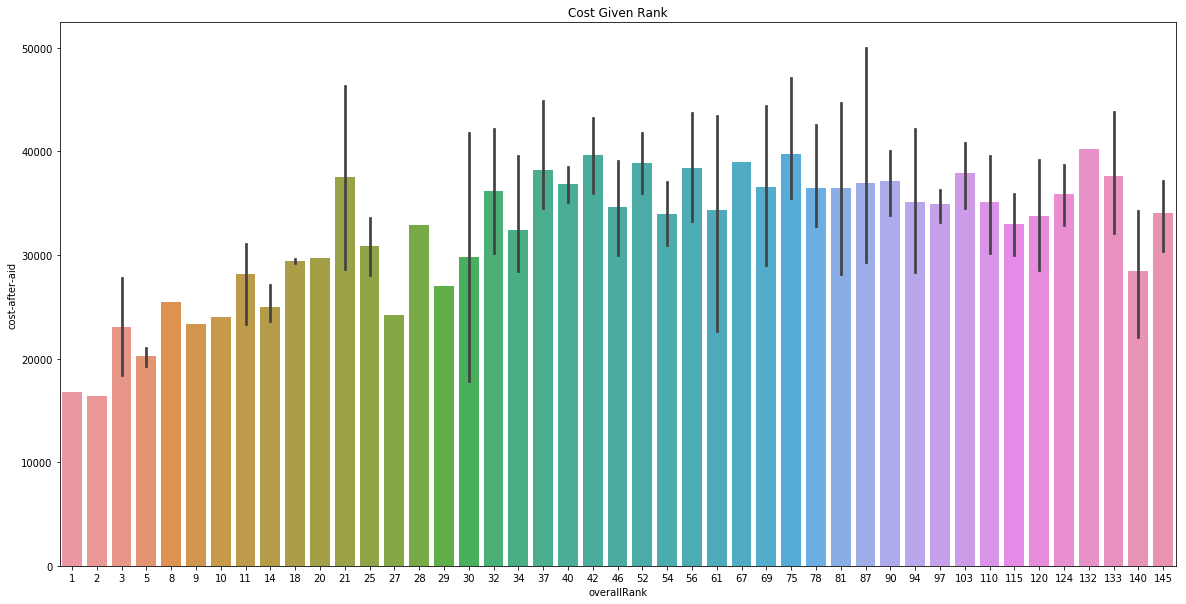

In [45]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_rank_cost['overallRank'], y=data_rank_cost['cost-after-aid'])
plt.title('Cost Given Rank')